In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import pandas as pd

In [12]:
rps = pd.read_csv('../exp/RPS/RPS_sp500_2021-Sep-21-13-49-00/future_performances.csv')
mtg = pd.read_csv('../exp/Mantegna/Mantegna_sp500_2021-Sep-21-13-45-34/future_performances.csv')
sa = pd.read_csv('../exp/SA/SA_sp500_2021-Sep-21-19-02-32/future_performance.csv')
rnd = pd.read_csv('../exp/Random/Random_sp500_2021-Sep-21-19-33-13/future_performances.csv')

In [13]:
rps['method'] = 'RPS'
mtg['method'] = 'MTG'
sa['method'] = 'SA'
rnd['method'] = 'RND'

In [14]:
merged = rps.append(mtg).append(sa).append(rnd).reset_index(drop=True)

In [15]:
merged

,stocks,weights,corr_min,corr_max,corr_mean,corr_std,return,sigma,sharpe,information,modigliani,method
0,AAL//AAPL//ADBE//ADI//ADM//ADSK//AES//AGN//ALG...,0.002122786795078598//0.0011557268724594928//0...,"[0.002122786795078598, 0.0011557268724594928, ...",-0.894065,0.997909,0.300443,0.472340,-0.054390,0.201582,-0.313968,-0.227563,RPS
1,BHF//O,0.2195418568343619//0.7804581431656381,"[0.2195418568343619, 0.7804581431656381]",0.194589,0.194589,0.194589,0.000000,0.595137,0.171413,3.420034,2.531836,RPS
2,ABC//AEE//AEP//AFL//AIG//AIZ//AJG//ALLE//AMD//...,0.0008710120358558479//0.013126596277824741//0...,"[0.0008710120358558479, 0.013126596277824741, ...",-0.913500,0.988801,0.268014,0.532349,-0.076259,0.179793,-0.473652,-0.320469,RPS
3,AMD//AMP//AMT//AVB//CBOE//CCI//CCL//CDNS//CHK/...,0.0010316449973071405//0.011522261448434084//0...,"[0.0010316449973071405, 0.011522261448434084, ...",-0.887375,0.973326,0.226637,0.479337,0.098860,0.163589,0.549915,0.423494,RPS
4,AEE//AFL//AIZ//AJG//ALLE//AON//APA//CB//CERN//...,0.013953457135237879//0.026258508082300378//0....,"[0.013953457135237879, 0.026258508082300378, 0...",-0.891166,0.988801,0.310216,0.532241,-0.143482,0.194582,-0.783125,-0.606052,RPS
...,...,...,...,...,...,...,...,...,...,...,...,...
95,APA//BK//FL//GPS//HP//IP//KSS//MO//NTAP//PVH//...,0.014808266222070003//0.0873085054883192//0.00...,"[0.014808266222070003, 0.0873085054883192, 0.0...",-0.420141,0.961327,0.573202,0.315372,-0.822351,0.294948,-2.818301,-3.490105,RND
96,BBY//FTI//IBM//KLAC//MU//NKE//OKE//PKG//PSX//T...,0.021647580012108945//0.016989115681116752//0....,"[0.021647580012108945, 0.016989115681116752, 0...",-0.417240,0.923533,0.231003,0.334080,-1.080420,0.459199,-2.372216,-4.586463,RND
97,AEP//AMT//ARE//AWK//CBOE//CCI//CME//ES//EXR//P...,0.07548714946062356//0.06642792011139156//0.31...,"[0.07548714946062356, 0.06642792011139156, 0.3...",-0.652874,0.975450,0.581358,0.519868,0.541221,0.143916,3.698830,2.302783,RND
98,BAX//BDX//BIIB//CMG//CVX//EW//HOLX//KIM,0.061644679600744136//0.07243377972142113//0.2...,"[0.061644679600744136, 0.07243377972142113, 0....",-0.709507,0.870536,0.259096,0.485955,-0.393144,0.212024,-1.896219,-1.666696,RND


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

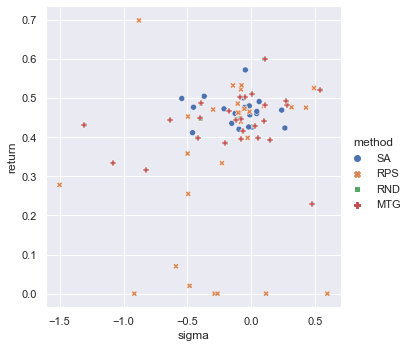

In [17]:
sns.relplot(
    data=merged.sort_values('method', ascending=False),
    x='sigma', y='return', hue='method', style='method',
)

In [19]:
merged.sort_values('return', ascending=False)

,stocks,weights,corr_min,corr_max,corr_mean,corr_std,return,sigma,sharpe,information,modigliani,method
20,ANSS//IVZ//SHW,0.1415112477243809//0.6864146751596378//0.1720...,"[0.1415112477243809, 0.6864146751596378, 0.172...",-0.609094,0.762318,-0.138979,0.698359,-0.879379,0.301853,-2.942751,-3.732379,RPS
87,CHD//CL//COF//CTAS//DFS//FIS//GPN//HAS//HSY//I...,0.3054268918726297//0.08261379585903017//0.123...,"[0.3054268918726297, 0.08261379585903017, 0.12...",-0.861804,0.949584,0.235134,0.600011,0.103415,0.189197,0.499561,0.442845,RND
41,CHD//CL//COF//CTAS//DFS//FIS//GPN//HAS//HSY//I...,0.3054268918726297//0.08261379585903017//0.123...,"[0.3054268918726297, 0.08261379585903017, 0.12...",-0.861804,0.949584,0.235134,0.600011,0.103415,0.189197,0.499561,0.442845,MTG
70,AIG//AKAM//AMAT//ARNC//BLL//CF//CINF//DFS//DHI...,0.07622608489221384//0.0771601187175176//0.096...,"[0.07622608489221384, 0.0771601187175176, 0.09...",-0.847958,0.958378,0.183258,0.571742,-0.046499,0.247385,-0.223939,-0.194039,SA
2,ABC//AEE//AEP//AFL//AIG//AIZ//AJG//ALLE//AMD//...,0.0008710120358558479//0.013126596277824741//0...,"[0.0008710120358558479, 0.013126596277824741, ...",-0.913500,0.988801,0.268014,0.532349,-0.076259,0.179793,-0.473652,-0.320469,RPS
...,...,...,...,...,...,...,...,...,...,...,...,...
24,CAG//WAT,0.7257474711589507//0.27425252884104934,"[0.7257474711589507, 0.27425252884104934]",0.071136,0.071136,0.071136,0.000000,0.116027,0.281148,0.381035,0.496424,RPS
27,HON//ZION,0.6082257864239156//0.39177421357608444,"[0.6082257864239156, 0.39177421357608444]",0.670624,0.670624,0.670624,0.000000,-0.287342,0.283206,-1.046033,-1.217218,RPS
14,KIM//SLG,0.6618972370535956//0.3381027629464044,"[0.6618972370535956, 0.3381027629464044]",0.128735,0.128735,0.128735,0.000000,-0.264128,0.182565,-1.495511,-1.118597,RPS
1,BHF//O,0.2195418568343619//0.7804581431656381,"[0.2195418568343619, 0.7804581431656381]",0.194589,0.194589,0.194589,0.000000,0.595137,0.171413,3.420034,2.531836,RPS


In [20]:
before_mtg = pd.read_csv('../exp/Mantegna/Mantegna_sp500_2021-Sep-21-13-38-58/mantegna_results.csv')
before_rps = pd.read_csv('../exp/RPS/RPS_sp500_2021-Sep-19-11-41-05/results.csv')

In [29]:
before_mtg['new_return'] = mtg['return']
before_mtg['new_sigma'] = mtg['sigma']
before_mtg['new_sharpe'] = mtg['sharpe']

In [30]:
before_rps['new_return'] = rps['return']
before_rps['new_sigma'] = rps['sigma']
before_rps['new_sharpe'] = rps['sharpe']

<AxesSubplot:xlabel='return', ylabel='new_return'>

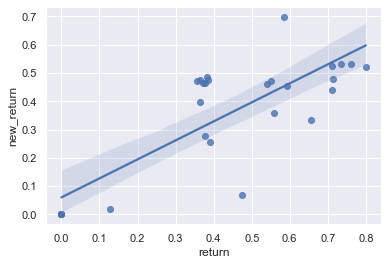

In [42]:
sns.regplot(data=before_rps, x="return", y="new_return")

<AxesSubplot:xlabel='return', ylabel='new_return'>

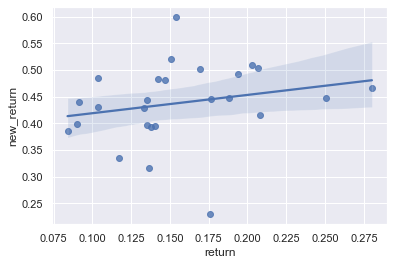

In [43]:
sns.regplot(data=before_mtg, x="return", y="new_return")

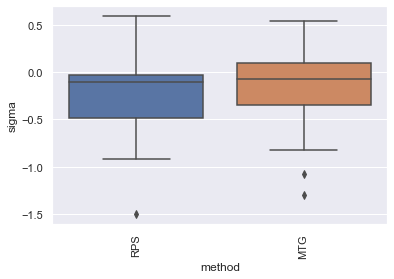

In [40]:
ax = sns.boxplot(x='method', y='sigma', data=merged)
r = plt.setp(ax.get_xticklabels(), rotation=90)